# **Проект второго модуля**

### Автор: Лукинова Диана
### Дата: 15.12.2025

### **1. Цель и задачи**
**Цель**: подготовить датасет к работе, исследовать динамику и структуру финансирования стартапов и ответить на вопросы, важные для оценки инвестиционных стратегий

**Задачи**:
* Провести предобработку данных, убрать дубликаты и пропуски, проверить корректность числовых и временных значений.
* Выделить группы компаний по срокам финансирования и сравнить их по количеству и объёму инвестиций.
* Классифицировать сегменты рынка на массовые, средние и нишевые и учесть это в дальнейшем анализе.
* Определить типичные и аномальные значения объёмов финансирования, исключить выбросы и ограничить период исследования.
* Сравнить популярность и объёмы разных типов финансирования.
* Проанализировать динамику раундов и объёмов инвестиций по годам, а также изменения в массовых сегментах рынка.
* Рассчитать долю возврата средств для разных типов финансирования и оценить её устойчивость.
* Подвести итоговые выводы и дать рекомендации, куда и каким образом было бы целесообразно инвестировать, если бы на дворе был 2015 год.


### **2. Данные**
Данные для анализа состоят из двух датасетов

* cb_investments.csv cодержит информацию о компаниях и состоявшемся финансировании
* cb_returns.csv cодержит информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов
#### `cb_investments.csv`
- name — название компании;
- homepage_url — ссылка на сайт компании;
- category_list — категории, в которых работает компания. Указываются через |;
- market — основной рынок или отрасль компании;
- funding_total_usd — общий объём привлечённых инвестиций в долларах США;
- status — текущий статус компании, например, operating, closed и так далее;
- country_code — код страны, например USA;
- state_code — код штата или региона, например CA;
- region — регион, например SF Bay Area;
- city — город, в котором расположена компания;
- funding_rounds — общее число раундов финансирования;
- participants — число участников в раундах финансирования;
- founded_at — дата основания компании;
- founded_month — месяц основания в формате YYYY-MM;
- founded_quarter — квартал основания в формате YYYY-QN;
- founded_year — год основания;
- first_funding_at — дата первого финансирования;
- mid_funding_at — дата среднего по времени раунда финансирования;
- last_funding_at — дата последнего финансирования;
- seed — сумма инвестиций на посевной стадии;
- venture — сумма венчурных инвестиций;
- equity_crowdfunding — сумма, привлечённая через долевой краудфандинг;
- undisclosed — сумма финансирования нераскрытого типа;
- convertible_note — сумма инвестиций через конвертируемые займы;
- debt_financing — сумма долгового финансирования;
- angel — сумма инвестиций от бизнес-ангелов;
- grant — сумма полученных грантов;
- private_equity — сумма инвестиций в виде прямых (частных) вложений;
- post_ipo_equity — сумма финансирования после IPO;
- post_ipo_debt — сумма долгового финансирования после IPO;
- secondary_market — сумма сделок на вторичном рынке;
- product_crowdfunding — сумма, привлечённая через продуктовый краудфандинг;
- round_A — round_H — сумма инвестиций в соответствующем раунде.

#### `cb_returns.csv`
- year — год возврата средств;
- seed — сумма возвратов от посевных инвестиций;
- venture — сумма возвратов от венчурных инвестиций;
- equity_crowdfunding — сумма, возвращённая по долевому краудфандингу;
- undisclosed — сумма возвратов нераскрытого типа;
- convertible_note — сумма возвратов через конвертируемые займы;
- debt_financing — сумма возвратов от долгового финансирования;
- angel — сумма возвратов бизнес-ангелам;
- grant — сумма возвратов по грантам;
- private_equity — сумма возвратов прямых (частных) вложений;
- post_ipo_equity — сумма возвратов от IPO;
- post_ipo_debt — сумма возвратов от долгового IPO;
- secondary_market — сумма возвратов от сделок на вторичном рынке;
- product_crowdfunding — сумма возвратов по продуктовому краудфандингу.

### **3. Знакомство с данными: загрузка и предобработка**

#### **3.1. Загрузка данных**

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [667]:
investments_df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)
returns_df = pd.read_csv('https://code.s3.yandex.net/datasets/cb_returns.csv')

In [668]:
#контроль размера датасетов
tmp_inv = investments_df.copy() 
print(len(tmp_inv))
tmp_ret = returns_df.copy() 
print(len(tmp_ret))

54294
15


#### **3.2. Знакомство с данными**

In [669]:
investments_df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [670]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [671]:
investments_df = investments_df.rename(columns={' market ' : 'market', ' funding_total_usd ' : 'funding_total_usd'})

In [672]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3   market                45477 non-null  object 
 4   funding_total_usd     49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Посчитаем процент пропусков

In [673]:
investments_df.isna().mean()

name                    0.089457
homepage_url            0.152963
category_list           0.162394
market                  0.162394
funding_total_usd       0.089439
status                  0.113641
country_code            0.186558
state_code              0.444487
region                  0.186558
city                    0.202085
funding_rounds          0.089439
participants            0.438741
founded_at              0.289903
founded_month           0.291229
founded_quarter         0.291229
founded_year            0.289903
first_funding_at        0.089439
mid_funding_at          0.442148
last_funding_at         0.089439
seed                    0.089439
venture                 0.089439
equity_crowdfunding     0.089439
undisclosed             0.089439
convertible_note        0.089439
debt_financing          0.089439
angel                   0.089439
grant                   0.089439
private_equity          0.089439
post_ipo_equity         0.089439
post_ipo_debt           0.089439
secondary_

Датасет `cb_investmets.csv` содержит 54294 строки и 40 столбцов. Во всех столбцах есть пропуски, а в большинстве столбцов 49438 заполненных строк. Во всех столбцах есть пропуски: в большинстве столбцов пропусков примерно 9% от всех данных, однако в столбцах `state_code`, `participants`, `mid_funding_at` пропуски составляют почти половину от всех данных. В столбцах `founded_at`, `founded_month`, `founded_quarter`, `founded_year`, `city`, `region`, `country_code` процент пропусков примерно 20-30.

На этапе предобработки данных нужно будет решить, как лучше поступить со строками с пропусками.

Соответствие типов данных:

Все данные соответствуют описанию, все типы верные, кроме столбцов с датами (их нужно будет обработать) и столбца `funding_total_usd` - здесь нужен числовой тип

Все названия столбцов были приведены к одному стилю, однако пришлось переименовать столбцы `funding_total_usd` и `market` на соответствующие без пробелов с двух сторон

In [674]:
returns_df.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [675]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [676]:
returns_df.isna().mean()

year                    0.0
seed                    0.0
venture                 0.0
equity_crowdfunding     0.0
undisclosed             0.0
convertible_note        0.0
debt_financing          0.0
angel                   0.0
grant                   0.0
private_equity          0.0
post_ipo_equity         0.0
post_ipo_debt           0.0
secondary_market        0.0
product_crowdfunding    0.0
dtype: float64

Датасет `cb_returns.csv` содержит 15 строк и 14 столбцов. В столбцах нет пропусков

Соответствие типов данных:

Все данные соответствуют описанию, все типы верные.

Названия в едином стиле и не требуют изменения

Для сравнения суммы возвратов с суммой инвестиций, нужно будет привести обе таблицы к одному виду (в долларах или миллионах долларов)

#### **3.3. Предобработка данных**

##### **3.3.1**

В стоблце `funding_total_usd` уберём деление по разрядам и приведём к числовому типу

In [677]:
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.replace(',', '')
investments_df['funding_total_usd']

0            90000000 
1             2000000 
2             9000000 
3             7700000 
4              540000 
5            19000000 
6            12000000 
7             8700000 
8             6000000 
9             3500000 
10           28000000 
11            2705000 
12            8900000 
13                -   
14            8000000 
15                -   
16            3900000 
17          750500000 
18            2000000 
19                -   
20          175000000 
21            2000000 
22           15304039 
23           90000000 
24             197634 
25           43500000 
26            5000000 
27                -   
28           13400000 
29            7700000 
30           30800000 
31           12500000 
32          150000000 
33             250000 
34            2300000 
35                -   
36            1400000 
37            6000000 
38           87900000 
39            9450000 
40            1200000 
41           28000000 
42           80000000 
43         

In [678]:
investments_df['funding_total_usd'][13]

' -   '

Среди значений встрчаются не только числа, поэтому заменим на nan

In [679]:
# приведем к числовому типу
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.strip().replace('-', np.nan)
investments_df['funding_total_usd'] = pd.to_numeric(investments_df['funding_total_usd'])


In [680]:
investments_df['funding_total_usd'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 54294 entries, 0 to 54293
Series name: funding_total_usd
Non-Null Count  Dtype  
--------------  -----  
40907 non-null  float64
dtypes: float64(1)
memory usage: 424.3 KB


Тип изменен корректно

##### **3.3.2**

Обработаем типы данных в столбцах даты и времени

In [681]:
for i in ['founded_at', 'founded_month', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    investments_df[i] = pd.to_datetime(investments_df[i], errors='coerce')

In [682]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49437 non-null  object        
 1   homepage_url          45989 non-null  object        
 2   category_list         45477 non-null  object        
 3   market                45477 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                48124 non-null  object        
 6   country_code          44165 non-null  object        
 7   state_code            30161 non-null  object        
 8   region                44165 non-null  object        
 9   city                  43322 non-null  object        
 10  funding_rounds        49438 non-null  float64       
 11  participants          30473 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [683]:
investments_df['founded_month'] = investments_df['founded_month'].dt.month
investments_df['founded_quarter'] = investments_df['founded_quarter'].dt.quarter
investments_df['founded_year'] = investments_df['founded_year'].dt.year


Даты приведены к корректному типу

##### **3.3.3**

В датасете `cb_returns` сделайте столбец year индексом всего датасета

In [684]:
returns_df = returns_df.set_index('year')

In [685]:
returns_df = returns_df * 1000000 #чтобы таблица была представлены в долларах, а не миллионах долларов

##### **3.3.4**

Заполним пропуски в текстовых столбцах заглушками

In [686]:
investments_df[['name',
 'homepage_url',
 'category_list',
 'market',
 'status',
 'country_code',
 'state_code',
 'region',
 'city']] = investments_df[['name',
 'homepage_url',
 'category_list',
 'market',
 'status',
 'country_code',
 'state_code',
 'region',
 'city']].fillna('неизвестно')

In [687]:
#также во всех текстовых столбцах обрежем пробелы в значениях (они могут изменять расчёты уникальных значений и тд)
for col in ['name',
 'homepage_url',
 'category_list',
 'market',
 'status',
 'country_code',
 'state_code',
 'region',
 'city']:
    investments_df[col] = investments_df[col].str.strip()

In [688]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  54294 non-null  object        
 1   homepage_url          54294 non-null  object        
 2   category_list         54294 non-null  object        
 3   market                54294 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                54294 non-null  object        
 6   country_code          54294 non-null  object        
 7   state_code            54294 non-null  object        
 8   region                54294 non-null  object        
 9   city                  54294 non-null  object        
 10  funding_rounds        49438 non-null  float64       
 11  participants          30473 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

Теперь в столбцах  с текстом нет пропусков

##### **3.3.5**

Посчитаем полные дубликаты

In [689]:
investments_df.duplicated().sum()

4855

In [690]:
#удалим полные дубликаты
investments_df = investments_df.drop_duplicates()

In [691]:
returns_df.duplicated().sum()

0

В датафрейме returns нет полных дубликатов

Посчитаем пропуски в столбце `funding_total_usd`

In [692]:
#
investments_df['funding_total_usd'].isna().sum()

8532

Удалим строки с пропуском в этом столбце, потому что эти строки не содержат информации о финансировании

было бы неправильно заполнять эти строки медианным значением или ставить ноль в качестве заглушки (ноль вполне может означать отсутствие финансирования)

In [693]:
investments_df = investments_df.dropna(subset=['funding_total_usd'])
investments_df['funding_total_usd'].isna().sum()

0

##### **3.3.6**

Заполним пропуски в столбце `mid_funding_at` на основании столбцов `first_funding_at` и `last_funding_at`

In [694]:
investments_df['mid_funding_at'] = investments_df['mid_funding_at'].fillna(
    investments_df['first_funding_at'] + 
    (investments_df['last_funding_at'] - investments_df['first_funding_at']) / 2
)

In [695]:
investments_df['mid_funding_at'].isna().sum()

1

Остался всего один пропуск, возможно это строка, где отсутствуют и first_funding_at, и last_funding_at

##### **3.3.7**

Оценим полноту данных и размер отсавшихся пропусков

In [696]:
# В датафрейме returns_df не удалялись никакие строки, в investments_df осталось:
len(investments_df) 


40907

In [697]:
# всего удалено строк из датафрейма investments
print(len(tmp_inv) - len(investments_df))
print((len(tmp_inv) - len(investments_df)) / len(investments_df)  * 100)

13387
32.72545041190994


Всего было отброшено 33 процента данных: среди них полные дубликаты, а также строки, где отсутствуют значения в столбце funding_total_usd

### **3. Инжиниринг признаков**

##### **3.1. Группы по срокам финансирования**

In [698]:
investments_df['funding_duration_days'] = (investments_df['last_funding_at'] - investments_df['first_funding_at']).dt.days

def categorize_funding(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif row['funding_duration_days'] <= 365:
        return 'Срок финансирования до года'
    elif row['funding_duration_days'] > 365:
        return 'Срок финансирования более года'

investments_df['funding_category'] = investments_df.apply(categorize_funding, axis=1)


In [699]:
investments_df['funding_category'].unique()

array(['Единичное финансирование', 'Срок финансирования до года',
       'Срок финансирования более года', None], dtype=object)

Есть пропуски, посмотрим на эти строки

In [700]:

rows_with_null_category = investments_df[investments_df['funding_category'].isna()]
rows_with_null_category[['funding_category', 'last_funding_at', 'first_funding_at', 'funding_rounds', 'round_A']]

,funding_category,last_funding_at,first_funding_at,funding_rounds,round_A
2177,None,2012-07-24,NaT,2.0,0.0
33041,None,2014-09-25,NaT,2.0,14300000.0


Неясно как заполнить данные, потому что дана только одна дата (однако раундов указано 2). Поставим заглушку "неизвестно"

In [701]:
investments_df['funding_category'] = investments_df['funding_category'].fillna('неизвестно')

In [702]:
investments_df['funding_category'].unique()

array(['Единичное финансирование', 'Срок финансирования до года',
       'Срок финансирования более года', 'неизвестно'], dtype=object)

Теперь данный столбец корректен. Представим распределение визуализацией

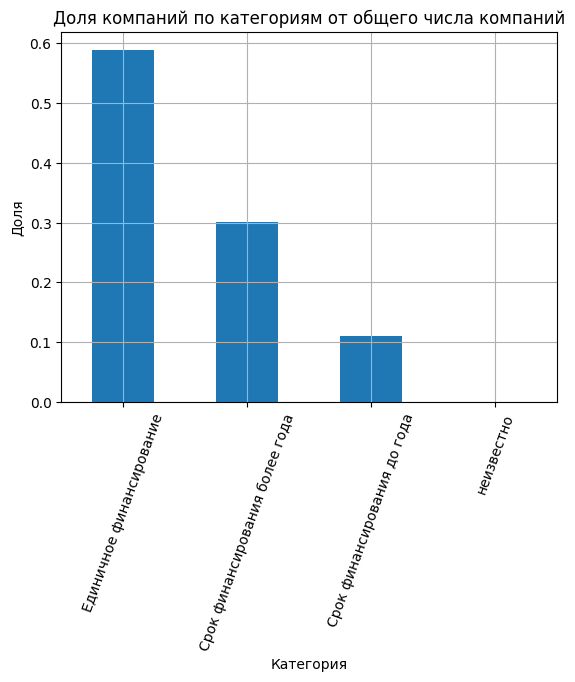

In [703]:
investments_df['funding_category'].value_counts(normalize=True).plot(kind='bar', title='Доля компаний по категориям от общего числа компаний',
                                    xlabel='Категория', 
                                    ylabel='Доля',
                                    rot=70)
plt.grid()
plt.show()

Чаще всего компания относится к категории единичного финансирования (чуть меньше 60% всех компаний), компаний со сроком финансирования более года 30%, а компаний со сроком до года - чуть больше 10%

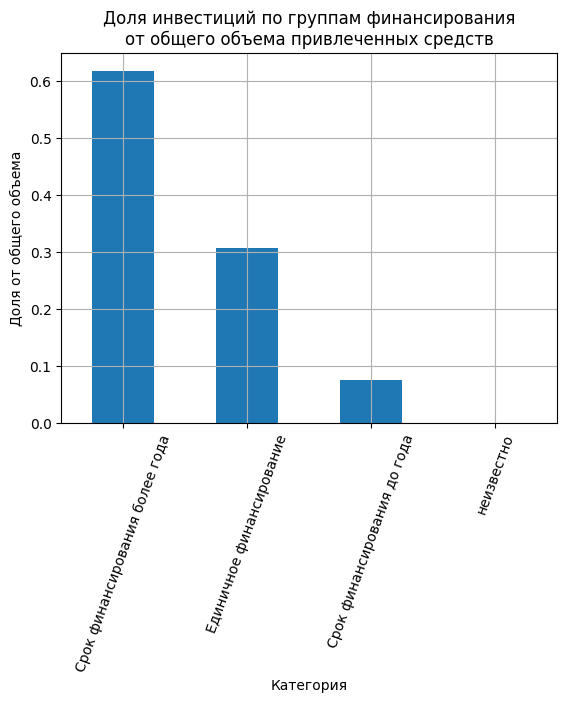

In [704]:
grouped = investments_df.groupby('funding_category')['funding_total_usd'].agg(['sum'])
grouped['fund_share'] = grouped['sum'] / investments_df['funding_total_usd'].sum()
grouped['fund_share'].sort_values(ascending=False).plot(kind='bar', title='Доля инвестиций по группам финансирования\nот общего объема привлеченных средств',
                                    xlabel='Категория', 
                                    ylabel='Доля от общего объема',
                                    rot=70)
plt.grid()
plt.show()

In [705]:
grouped.reset_index()[['funding_category', 'fund_share']]

,funding_category,fund_share
0,Единичное финансирование,0.306182
1,Срок финансирования более года,0.618664
2,Срок финансирования до года,0.075101
3,неизвестно,0.000053


Значительную долю от общего объёма привлеченных средств получила категория со сроком финансирования более года (около 62 процентов). 30% - компании в категории единичного финансирования, примерно 7.5% процентов - компании со сроком финансирования до года

##### **3.2. Выделение средних и нишевых сегментов рынка**

Рассчитаем, как часто в датасете встречается каждый из сегментов столбца `market`

In [706]:
print(investments_df['market'].value_counts())
segments = investments_df['market'].value_counts().reset_index()
segments.columns = ['name', 'count']


Software                              4812
Biotechnology                         3590
неизвестно                            2503
Mobile                                2344
E-Commerce                            1866
Curated Web                           1693
Enterprise Software                   1381
Health Care                           1185
Clean Technology                      1180
Games                                 1117
Advertising                           1107
Hardware + Software                   1062
Social Media                          1003
Health and Wellness                    873
Education                              844
Finance                                828
Analytics                              667
Manufacturing                          596
Security                               567
Semiconductors                         484
Web Hosting                            424
Consulting                             349
Hospitality                            336
Travel     

In [707]:
segments['segment_type'] = pd.cut(segments['count'], bins=[0, 34, 120, float('inf')], labels=['нишевый', 'средний', 'массовый'])
segment_counts = segments['segment_type'].value_counts()
print("Количество сегментов в каждой категории:")
print(segment_counts)

Количество сегментов в каждой категории:
нишевый     289
средний      57
массовый     49
Name: segment_type, dtype: int64


In [708]:

segments.groupby('segment_type')['count'].agg(['sum']) # Количество компаний в каждой категории

,sum
segment_type,
нишевый,830
средний,3841
массовый,36236


In [709]:
# выбираем компании с нишевым или средним сегментом
filtered_df_niche_mid = segments[(segments['segment_type'] == 'нишевый') | (segments['segment_type'] == 'средний')]


<Figure size 1000x600 with 0 Axes>

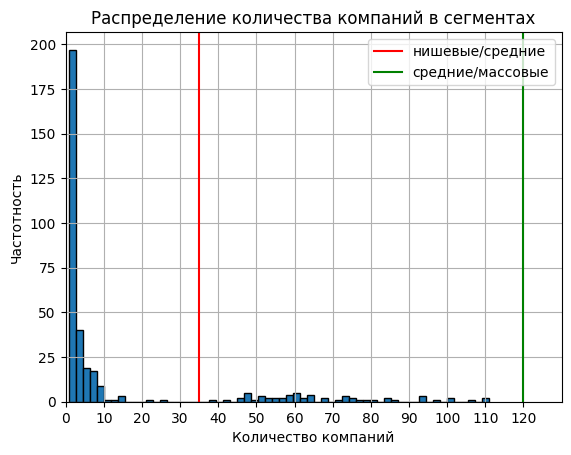

In [710]:
plt.figure(figsize=(10, 6))
filtered_df_niche_mid.hist(bins=60, edgecolor='black')
plt.axvline(x=35, color='red', label="нишевые/средние")
plt.axvline(x=120, color='green', label="средние/массовые")
plt.legend()
plt.xlim(0, 130)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.title('Распределение количества компаний в сегментах')
plt.xlabel('Количество компаний')
plt.ylabel('Частотность')
plt.legend(loc='upper right')
plt.show()

По графику видно, что большинство (чуть меньше 200) нишевых сегментов включает в себя 1-2 компании. Примерно 40 сегментов включают в себя 3-4 компании. Очень редко сегменты нишевой категории имеют более 10 компаний. 

В среднем сегменте распределение более равномерное в диапазоне от 35 до 120, однако нет ни одного сегмента, который бы включал в себя более 110-111 компаний

Оставим в столбце `market` только названия массовых сегментов, остальные заменим заглушками niche и mid

In [711]:
def classify_market(market):
    
    segment_type = segments[segments['name'] == market]['segment_type'].iloc[0] 
    if segment_type == 'нишевый':
        return 'niche'
    elif segment_type == 'средний':
        return 'mid'
    else:
        return market

investments_df['market'] = investments_df['market'].apply(classify_market)

### **4. Работа с выбросами и анализ**

#### **4.1. Анализируем и помечаем выбросы в каждом из сегментов**

Построим ящик с усами с отображением выбросов и без

<Axes: >

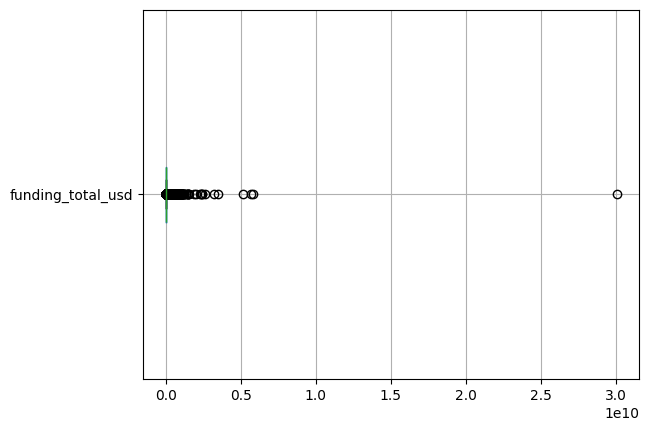

In [712]:
investments_df.boxplot(column='funding_total_usd', vert=False)

<Axes: >

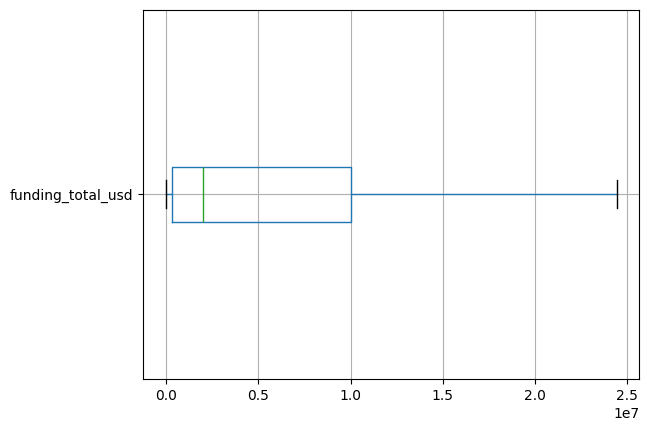

In [713]:
investments_df.boxplot(column='funding_total_usd', vert=False, showfliers=False)

In [714]:
investments_df['funding_total_usd'].describe()

count    4.090700e+04
mean     1.591253e+07
std      1.686788e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

Усы расположены несимметрично, данные сильно смещены вправо относительно медианы, то есть общий объём привлечённых средств в основном сосредоточен у небольшого количества компаний, которые привлекли очень крупные инвестиции.

Типичные значения для этого столбца находятся в диапазоне от 3.500000e+05 до 1.000000e+07

Определим компании с аномальным объёмом общего финансирования

In [715]:
# Определяем первый и третий квартили для каждого сегмента
q1 = investments_df.groupby('market')['funding_total_usd'].quantile(0.25)
q3 = investments_df.groupby('market')['funding_total_usd'].quantile(0.75)
iqr = q3 - q1
# Рассчитаем верхнюю и нижнюю границы для каждого сегмента
lower_border = q1 - 1.5 * iqr
upper_border = q3 + 1.5 * iqr
# Определим данные, находящиеся за пределами верхней и нижней границы
outliers_df = investments_df[
(investments_df['funding_total_usd'] < investments_df['market'].map(lower_border)) |
(investments_df['funding_total_usd'] > investments_df['market' ].map(upper_border))]


Считаем процент компаний, получивших аномальное финансирование

In [716]:
share_anomalies = outliers_df['market'].value_counts() / investments_df['market'].value_counts()
round(share_anomalies.sort_values(ascending=False), 2)

Real Estate             0.17
Entertainment           0.17
Consulting              0.17
Search                  0.16
Cloud Computing         0.16
Photography             0.16
SaaS                    0.16
Technology              0.16
Video                   0.16
niche                   0.16
Travel                  0.15
Networking              0.15
Internet                0.15
Big Data                0.15
Marketplaces            0.15
неизвестно              0.15
mid                     0.14
E-Commerce              0.14
Apps                    0.14
Automotive              0.14
Medical                 0.14
Sports                  0.14
Social Media            0.14
News                    0.13
Education               0.13
Fashion                 0.13
Mobile                  0.13
Hospitality             0.13
Health and Wellness     0.13
Messaging               0.13
Clean Technology        0.13
Startups                0.13
Social Network Media    0.13
Finance                 0.13
Music         

Топ-10 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование

In [717]:
round(share_anomalies.sort_values(ascending=False), 2).head(10)

Real Estate        0.17
Entertainment      0.17
Consulting         0.17
Search             0.16
Cloud Computing    0.16
Photography        0.16
SaaS               0.16
Technology         0.16
Video              0.16
niche              0.16
Name: market, dtype: float64

Наибольшая доля компаний с аномальным финансированием составляет 17%, это сегменты - Real Estate, Entertainment, Consulting. Следующая по величине доля - 16% (здесь 7 сегментов), исследуемая доля компаний в остальных сегментах находится в диапазоне от 15 до 7 процентов.

##### **4.2 Определяем границы рассматриваемого периода, отбрасываем аномалии**

In [718]:
investments_df['month'] = investments_df['mid_funding_at'].dt.month
investments_df['year'] = investments_df['mid_funding_at'].dt.year
df_2014 = investments_df[investments_df['year'] == 2014].copy()
grouped_year_month = df_2014[['name', 'year', 'month']].groupby(['year', 'month']).agg(company_count=('name', 'count'))
grouped_year_month = grouped_year_month.reset_index()

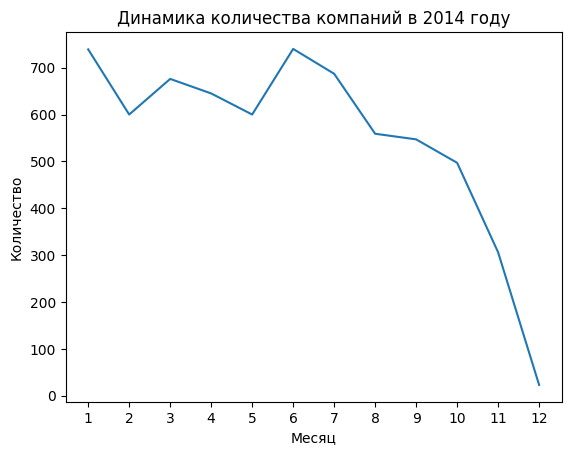

In [719]:
grouped_year_month.plot(kind='line', x='month', y='company_count', legend=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title('Динамика количества компаний в 2014 году')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

По таблице и графику видно, что в декабре наблюдается резкое падение количества компаний, то есть можно считать, что за декабрь данные представлены не полностью, следовательно за 2014 год в датасете представлены неполные данные

In [720]:
# отбросим строки с аномальными значениями
investments_df = investments_df[
(investments_df['funding_total_usd'] > investments_df['market'].map(lower_border)) |
(investments_df['funding_total_usd'] < investments_df['market' ].map(upper_border))]

Оставим в датасете данные о компаниях, которые получили финансирование в годы, в которые было больше 50 раундов

In [721]:
rounds_per_year = investments_df.groupby(investments_df['mid_funding_at'].dt.year)['funding_rounds'].sum()
valid_years = rounds_per_year[rounds_per_year > 50].index.tolist()
print(valid_years)
investments_df = investments_df[investments_df['year'].isin(valid_years)]

[1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]


Период 1999-2014 - это года, в которые было более 50 раундов финансирования

#### **4.3. Анализ типов финансирования по объёму и популярности**

In [722]:
funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
    'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity', 'post_ipo_debt',
    'secondary_market', 'product_crowdfunding'
]
types_df = pd.DataFrame({'type' : funding_types})

In [723]:
sums = []
for i in funding_types:
    sums.append(investments_df[i].sum())

In [724]:
types_df['sum'] = sums
types_df.sort_values(by='sum', ascending=False)

,type,sum
1,venture,3.704133e+11
8,private_equity,1.025485e+11
5,debt_financing,9.334670e+10
9,post_ipo_equity,3.010150e+10
10,post_ipo_debt,2.192259e+10
0,seed,1.073538e+10
7,grant,8.050745e+09
3,undisclosed,6.437430e+09
6,angel,3.233584e+09
11,secondary_market,1.901184e+09


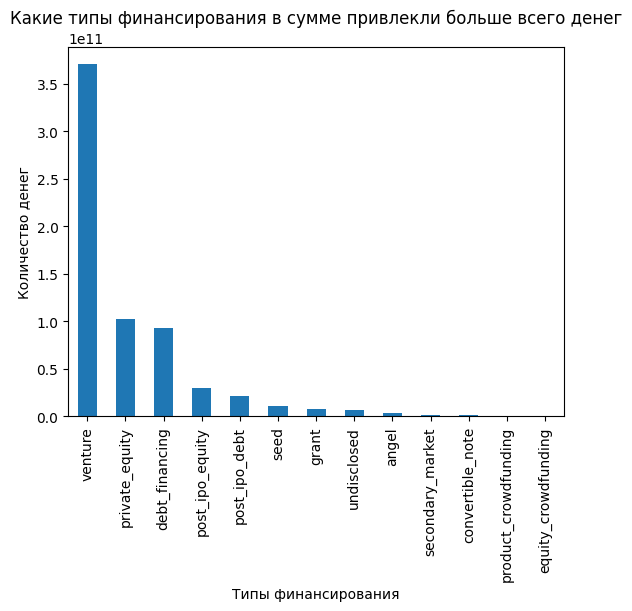

In [725]:
types_df.sort_values(by='sum', ascending=False).plot(kind='bar', x='type', legend=False,
                                                     title='Какие типы финансирования в сумме привлекли больше всего денег',
                                                     xlabel='Типы финансирования',
                                                     ylabel='Количество денег')
plt.show()

Венчурные инвестиции привлекли больше всего денег - 3.704133e+11, также значимый вклад у инвестиций в виде прямых вложений (1.025485e+11) и долгового финансирования (9.334670e+10) 

Остальные типы финансирования привлекли гораздо меньше денег


In [726]:
counts = []
for i in funding_types:
    counts.append(investments_df[investments_df[i] > 0][i].count())
types_df['count'] = counts
types_df.sort_values(by='count', ascending=False)

,type,sum,count
1,venture,3.704133e+11,23237
0,seed,1.073538e+10,13822
5,debt_financing,9.334670e+10,4225
6,angel,3.233584e+09,3127
8,private_equity,1.025485e+11,1373
7,grant,8.050745e+09,1142
3,undisclosed,6.437430e+09,951
4,convertible_note,1.155074e+09,557
2,equity_crowdfunding,3.047023e+08,522
9,post_ipo_equity,3.010150e+10,316


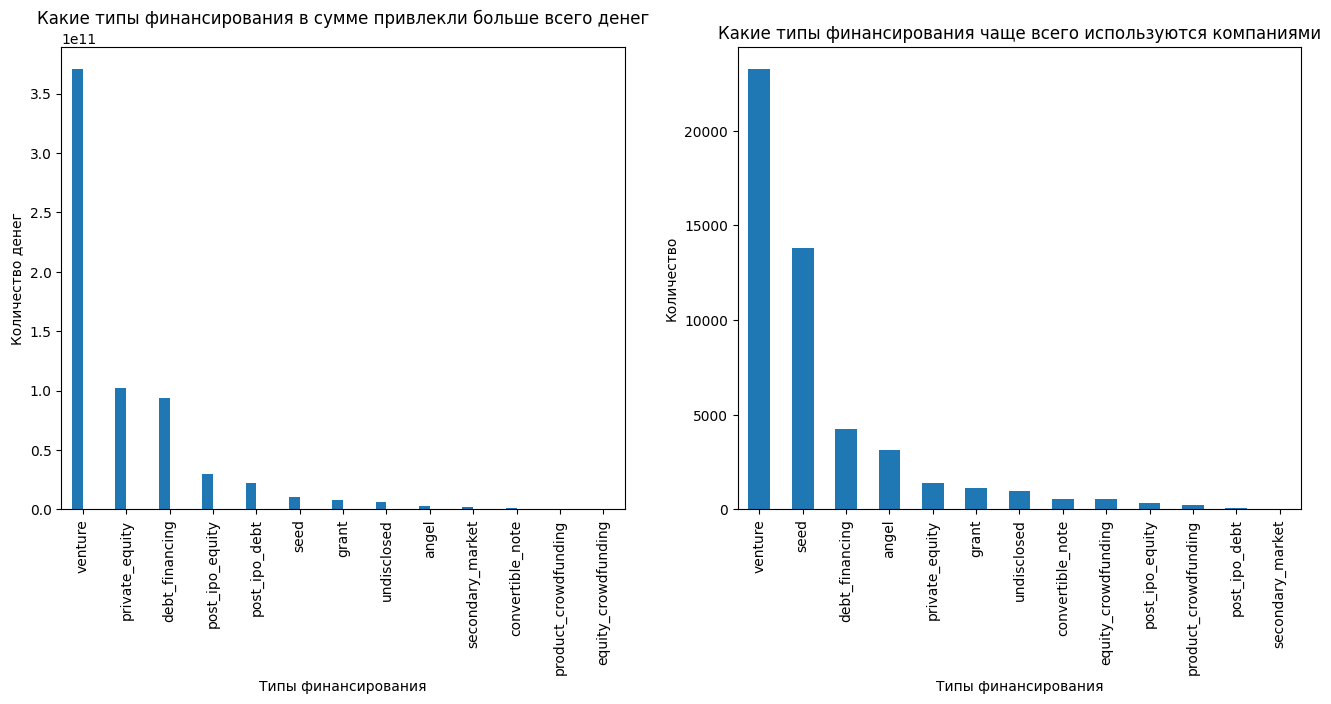

In [727]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
types_df.sort_values(by='sum', ascending=False).plot(kind='bar', x='type', legend=False,
                                                     ax=axes[0],
                                                     title='Какие типы финансирования в сумме привлекли больше всего денег',
                                                     xlabel='Типы финансирования',
                                                     ylabel='Количество денег')
types_df.sort_values(by='count', ascending=False).plot(kind='bar', x='type', y='count', legend=False,
                                                     ax=axes[1],
                                                     title='Какие типы финансирования чаще всего используются компаниями',
                                                     xlabel='Типы финансирования',
                                                     ylabel='Количество')
plt.show()

По графикам видно, что ожидаемо самый прибыльный тип финансирования является и самым популярным среди компаний - тип венчурных инвестиций (23237 компаний). Следующим по популярности является тип seed (сумма инвестиций на посевной стадии) - 13822 компаний. Также популярными являются типы долгового финансирования (4225) и инвестиций от бизнес-ангелов (3127).

Интересно, что второй по сумме привлечённых средств тип является лишь пятым по популярности (с 1373 компаниями)

Таким образом, инвестицими на посевной стадии и инвестиции от бизнес-ангелов являются популярными, однако характеризуются маленькими объёмами привлечённых средств (соответственно 1.073538e+10 и 3.233584e+09)

И наоборот, тип долгового финансирования и тип инвестиций в виде прямых вложений являются довольно прибыльными, но менее популярными, чем можно было ожидать

график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета

In [728]:
returns = []
for i in funding_types:
    returns.append(returns_df[i].sum())
types_df['return'] = returns
types_df.sort_values(by='return', ascending=False)

,type,sum,count,return
1,venture,3.704133e+11,23237,4.057862e+10
5,debt_financing,9.334670e+10,4225,4.734850e+09
8,private_equity,1.025485e+11,1373,3.587330e+09
0,seed,1.073538e+10,13822,2.382240e+09
6,angel,3.233584e+09,3127,1.509230e+09
9,post_ipo_equity,3.010150e+10,316,1.104960e+09
3,undisclosed,6.437430e+09,951,7.308800e+08
10,post_ipo_debt,2.192259e+10,75,9.103000e+07
4,convertible_note,1.155074e+09,557,3.479000e+07
11,secondary_market,1.901184e+09,19,5.200000e+06


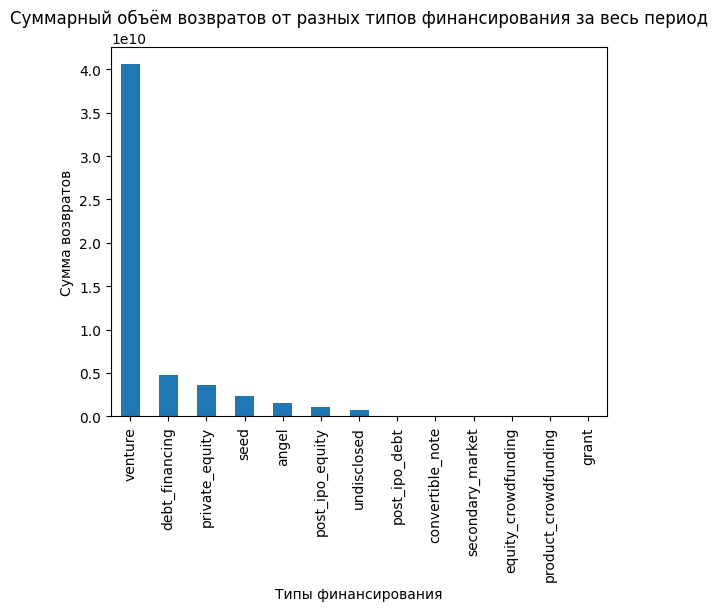

In [729]:
types_df.sort_values(by='return', ascending=False).plot(kind='bar', x='type', y='return', legend=False,
                                                     title='Суммарный объём возвратов от разных типов финансирования за весь период',
                                                     xlabel='Типы финансирования',
                                                     ylabel='Сумма возвратов')
plt.show()

По графику видно, что венчурные инвестиции приносят больше всего возвратов (4.057862e+10), следующие две позиции занимают типы долгового финансирования и инвестиций в виде прямых вложений, то есть те же типы финансирования, которые приносят больше всего дохода

### **5. Анализ динамики**

#### **5.1. Динамика предоставления финансирования по годам**

динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования

In [730]:
investments_df['avg_round'] = investments_df['funding_total_usd'] / investments_df['funding_rounds']

In [731]:
# группируем по годам

grouped_avg_round = investments_df.groupby('year').agg(avg_round=('avg_round', 'mean'),
    median_round=('avg_round', 'median'))
grouped_avg_round = grouped_avg_round.reset_index()
grouped_avg_round

,year,avg_round,median_round
0,1999.0,1.701633e+07,5.650000e+06
1,2000.0,9.927126e+06,5.950000e+06
2,2001.0,8.827382e+06,5.164104e+06
3,2002.0,1.410691e+07,4.791667e+06
4,2003.0,6.825947e+06,3.883919e+06
5,2004.0,8.508092e+06,6.037500e+06
6,2005.0,1.039497e+07,5.400000e+06
7,2006.0,9.708791e+06,5.079262e+06
8,2007.0,9.257709e+06,4.280000e+06
9,2008.0,1.013456e+07,3.990000e+06


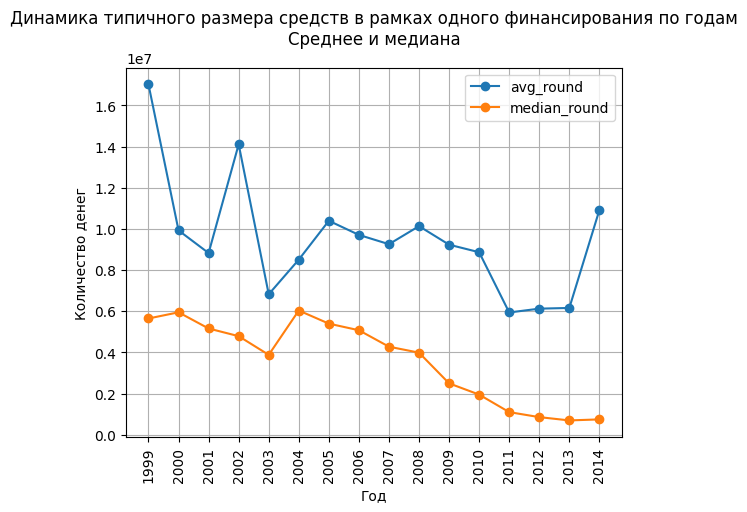

In [732]:
plt.figsize=(16, 6)
grouped_avg_round.plot(kind='line', x='year', legend=True,
                                                     title='Динамика типичного размера средств в рамках одного финансирования по годам\nСреднее и медиана',
                                                     xlabel='Год',
                                                     ylabel='Количество денег',
                                                     marker='o',
                                                     rot=90)
plt.grid()
plt.xticks(range(1999, 2015))
plt.show()

**В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?**

Видно, что среднее значение отличается от медианного. В соответствии со средним значением **типичный размер средств, собранных в рамках одного раунда**, был максимальным в 1999 году (1.701633e+07). Судя по медианному значению - 2004 год (6.037500e+06).

Динамика общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность)

In [733]:
grouped_num_round = investments_df.groupby('year').agg(sum=('funding_rounds', 'sum'))
grouped_num_round = grouped_num_round.reset_index()
grouped_num_round.sort_values(by='sum', ascending=False)

,year,sum
14,2013.0,14276.0
13,2012.0,11354.0
12,2011.0,9248.0
11,2010.0,8266.0
15,2014.0,7757.0
10,2009.0,7003.0
9,2008.0,6024.0
8,2007.0,4845.0
7,2006.0,2914.0
6,2005.0,1446.0


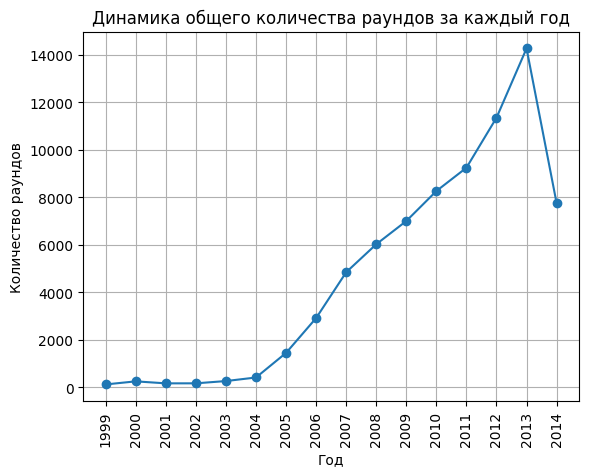

In [734]:
plt.figsize=(16, 6)
grouped_num_round.plot(kind='line', x='year', legend=False,
                                                     title='Динамика общего количества раундов за каждый год',
                                                     xlabel='Год',
                                                     ylabel='Количество раундов',
                                                     marker='o',
                                                     rot=90)
plt.grid()
plt.xticks(range(1999, 2015))
plt.show()

По графику видно, что в период с 1999 года по 2013 происходил постепенный рост общего количества раундов (максимум был достигнут в 2013 и составлял 14276 раундов), в то время как в 2014 произошло резкое падение (7757 раундов)

**Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?**

В 2014 году произошло резкое падение количества раундов, а также падение количества выделяемых в рамках каждого раунда средств (если смотреть на медианное значение). Второй вывод, в отличие от первого, можно назвать ожидаемым, потому что начиная с 2004 года медианное значение типичного количества средств в рамках одного раунда начало постепенно снижаться. Резкое снижение раунда могло быть вызвано тем, что данные за 2014 представлены не полностью (представлено мало действий за декабрь), хотя недостаток данных за один месяц вряд ли бы так сильно повлиял на показатель

#### **5.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов**

In [735]:
# создаем своодную таблицу, в которой указывается суммарный размер общего финансирования по годам и сегментам рынка
pivot = investments_df.pivot_table(values='funding_total_usd', index='market', columns='year', aggfunc='sum')
pivot

year,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
market,,,,,,,,,,,,,,,,
Advertising,74850000.0,227270000.0,41778321.0,2.450000e+07,48500000.0,199085670.0,3.192635e+08,1.765216e+09,1.936815e+09,3.131479e+09,1.994181e+09,1.703062e+09,9.080195e+08,9.480870e+08,8.035551e+08,3.127923e+08
Analytics,10774916.0,14822803.0,NaN,7.500000e+06,3840000.0,3000000.0,2.378429e+08,3.054875e+08,6.385806e+08,7.604176e+08,3.059962e+09,7.171889e+08,1.113466e+09,1.220101e+09,1.023694e+09,2.214616e+08
Apps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310600e+06,2.025000e+07,2.140000e+07,5.275575e+07,6.820918e+07,2.437407e+07,8.043279e+07,1.141391e+08,2.374519e+08
Automotive,NaN,NaN,NaN,NaN,4530000.0,NaN,7.878258e+07,8.606600e+08,3.771260e+07,1.730329e+09,3.266746e+08,2.392301e+08,7.645216e+07,1.105577e+08,1.838225e+08,9.923416e+07
Big Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.961206e+07,9.535167e+07,1.302928e+08,5.245757e+08,1.335792e+08,3.389245e+08,1.839989e+08,1.395326e+08
Biotechnology,NaN,210996580.0,96129290.0,NaN,163581178.0,97184859.0,9.061883e+08,2.254112e+09,5.118809e+09,4.428245e+09,1.401007e+10,1.321843e+10,1.018662e+10,8.553284e+09,1.253135e+10,4.047653e+09
Clean Technology,NaN,NaN,NaN,3.439044e+07,50352939.0,183865419.0,1.101420e+09,4.348769e+08,2.629547e+09,1.509725e+10,7.029475e+09,5.628106e+09,3.278044e+09,2.558549e+09,5.450355e+09,1.937900e+09
Cloud Computing,NaN,11500000.0,81000000.0,NaN,NaN,31597282.0,NaN,6.420181e+07,1.847941e+08,2.613425e+08,8.222372e+07,1.344324e+08,3.881514e+08,1.931274e+08,2.574968e+08,7.344086e+07
Consulting,115200.0,69400000.0,NaN,NaN,NaN,62791270.0,6.486200e+07,2.159302e+08,2.768463e+08,4.784924e+08,2.376677e+08,2.399149e+08,3.139324e+08,1.348745e+08,4.515040e+08,4.846721e+08


In [736]:
# оставляем только те сегменты, где показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013
pivot = pivot[pivot[2014] - pivot[2013] > 0]

In [737]:
# оставим только массовые сегменты
pivot = pivot[~pivot.index.isin(['niche', 'mid', 'неизвестно'])]
pivot

year,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
market,,,,,,,,,,,,,,,,
Apps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310600e+06,2.025000e+07,2.140000e+07,5.275575e+07,6.820918e+07,2.437407e+07,8.043279e+07,1.141391e+08,2.374519e+08
Consulting,115200.0,69400000.0,NaN,NaN,NaN,62791270.0,6.486200e+07,2.159302e+08,2.768463e+08,4.784924e+08,2.376677e+08,2.399149e+08,3.139324e+08,1.348745e+08,4.515040e+08,4.846721e+08
Design,NaN,NaN,NaN,NaN,NaN,NaN,9.300000e+06,7.070000e+05,1.080000e+07,5.944302e+06,2.955014e+07,5.831800e+08,3.802250e+08,1.237678e+08,1.896988e+08,5.906695e+08
Enterprise Software,6246800.0,4711445.0,2180175.0,172664356.0,7669661.0,51270000.0,6.340523e+08,1.169224e+09,2.295535e+09,2.697674e+09,4.075082e+09,3.140335e+09,2.888484e+09,1.796431e+09,1.740976e+09,2.361543e+09
Entertainment,NaN,97600000.0,NaN,NaN,NaN,NaN,1.000000e+07,7.700000e+07,1.812240e+08,1.065825e+09,1.106958e+07,7.725999e+07,1.135057e+08,1.478880e+08,2.450314e+08,2.888382e+08
Finance,NaN,15000000.0,127620230.0,NaN,25320000.0,NaN,3.558350e+08,3.555398e+08,1.763340e+09,1.225893e+09,7.078617e+08,1.962031e+09,1.755655e+09,1.747841e+09,3.599809e+09,6.727061e+09
Hospitality,NaN,NaN,NaN,NaN,NaN,NaN,1.020480e+06,1.465581e+07,1.354717e+07,6.935820e+07,2.063096e+08,2.286504e+08,8.272794e+08,5.114757e+08,1.563772e+09,2.105216e+09
Internet,333200000.0,10000000.0,NaN,1100000.0,180500000.0,10500000.0,7.177500e+07,9.877500e+07,3.836122e+08,4.765721e+08,5.853755e+09,1.468575e+08,5.685903e+07,1.535929e+09,2.073321e+08,2.432439e+08
Manufacturing,NaN,56659310.0,2368582.0,255700000.0,4269608.0,3000000.0,1.057700e+08,4.796658e+08,2.037756e+08,2.545810e+09,1.114909e+09,1.054054e+09,1.044263e+09,9.753705e+08,8.705290e+08,8.963323e+08


In [738]:
# траспонируем таблицу
df_t = pivot.T

In [739]:
# делим на две части, чтобы нарисовать два графика, на которых сегменты будут располагаться свободнее
df_t_1 = df_t[['Apps', 'Consulting', 'Design', 'Enterprise Software', 'Entertainment',
       'Finance', 'Hospitality', 'Internet']]
df_t_2 = df_t[['Manufacturing', 'Medical',
       'Nonprofits', 'Real Estate', 'Software', 'Sports', 'Startups', 'Video']]

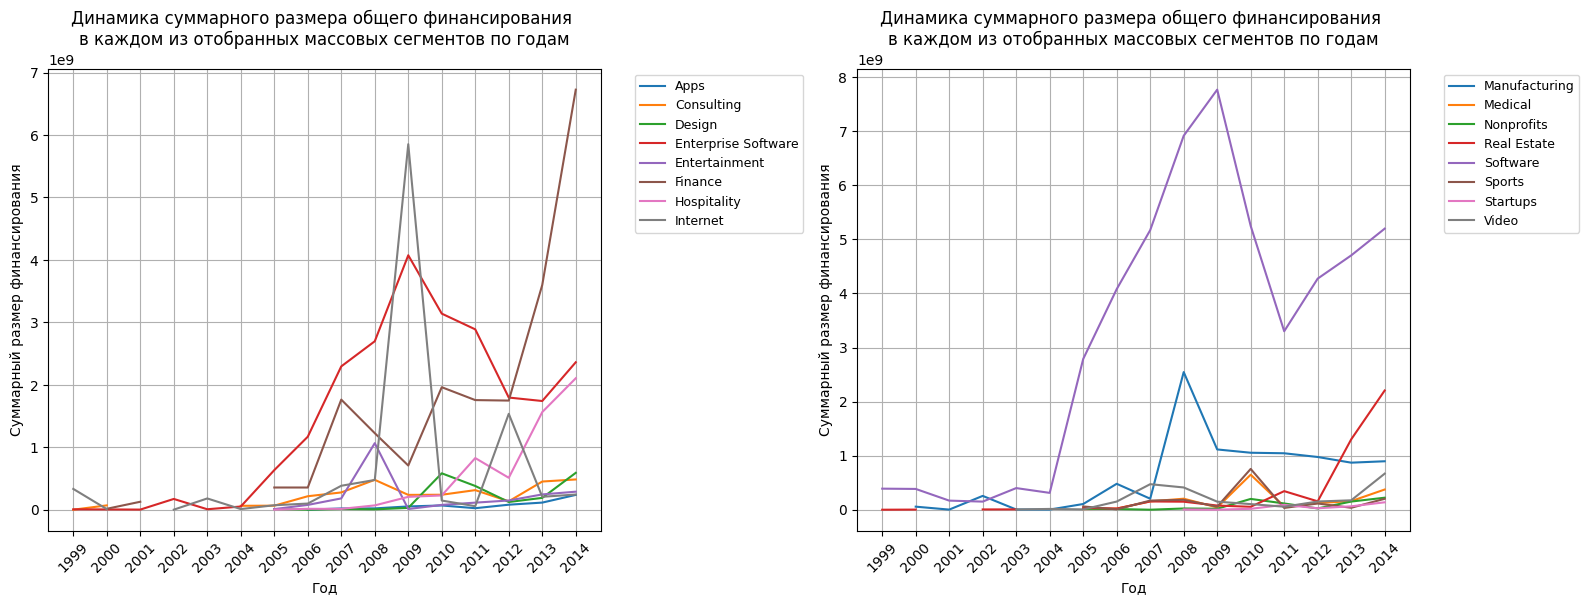

In [740]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df_t_1.plot(kind='line',
           rot=45,
           ax=axes[0],
           title='Динамика суммарного размера общего финансирования \nв каждом из отобранных массовых сегментов по годам',
           xlabel='Год',
           ylabel='Суммарный размер финансирования')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0].grid()
axes[0].set_xticks(range(1999, 2015))

df_t_2.plot(kind='line',
           rot=45,
           ax=axes[1],
           title='Динамика суммарного размера общего финансирования \nв каждом из отобранных массовых сегментов по годам',
           xlabel='Год',
           ylabel='Суммарный размер финансирования')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid()
plt.xticks(range(1999, 2015))
plt.tight_layout()
plt.show()


Наиболее быстрый и уверенный рост показывает сегмент Finance (устойчивый рост с 2005 по 2014), с 2004 по 2009 устойчивый и быстрый рост демонстрирует сегмент Enterprise Software, с 2004 по 2011 - сегмент Software. Начиная с 2008 Hospitality также демонстрирует устойчивый, однако не быстрый рост

#### **5.3 Годовая динамика доли возвращённых средств по типам финансирования**

In [741]:
# группируем по годам инвестиции
grouped_inv = investments_df.groupby('year')[funding_types].sum()
grouped_inv = grouped_inv[grouped_inv.index != 1999] #уберем 1999, потому что его нет в returns_df
grouped_inv

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000.0,4.183182e+07,2.005038e+09,0.0,4.317026e+08,0.0,6.865000e+07,26086333.0,8.075714e+06,1.680000e+08,3.467747e+06,0.000000e+00,7718867.0,0.0
2001.0,2.639896e+07,1.200220e+09,0.0,2.337541e+08,1500000.0,6.482922e+07,1000000.0,1.000000e+05,1.484864e+08,0.000000e+00,0.000000e+00,0.0,0.0
2002.0,1.822672e+07,1.070444e+09,0.0,8.771509e+07,0.0,2.153097e+08,8000000.0,0.000000e+00,1.153442e+09,3.000000e+05,0.000000e+00,0.0,0.0
2003.0,1.826122e+07,2.024470e+09,0.0,1.028000e+07,1500000.0,2.130100e+07,48026240.0,1.785072e+07,2.773597e+07,8.171349e+07,0.000000e+00,0.0,0.0
2004.0,3.177137e+07,3.739920e+09,0.0,9.964240e+07,0.0,1.661901e+08,11563741.0,1.402753e+07,1.730000e+08,0.000000e+00,0.000000e+00,0.0,0.0
2005.0,5.208120e+07,1.260429e+10,0.0,2.746224e+07,0.0,7.503397e+08,64467827.0,6.266481e+06,1.358152e+09,1.748190e+09,2.223000e+08,126700000.0,0.0
2006.0,1.036508e+08,2.342169e+10,933057.0,2.035728e+08,30280281.0,3.224688e+09,89898898.0,6.147500e+06,2.434830e+09,1.886597e+08,5.000000e+07,63750000.0,0.0
2007.0,2.910319e+08,3.856111e+10,0.0,2.840666e+08,22468041.0,2.887082e+09,261202441.0,3.786978e+08,8.304915e+09,1.367900e+09,3.200000e+07,0.0,0.0
2008.0,3.585767e+08,5.285119e+10,0.0,5.927231e+08,42753578.0,5.275522e+09,276424613.0,2.826542e+08,1.090026e+10,1.425270e+09,3.500000e+07,0.0,1100000.0


In [742]:
inv_ret_df = returns_df / (grouped_inv + 1e-60)
inv_ret_df

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,0.399218,0.027630,0.000000e+00,0.181166,0.000000e+00,0.126147,0.246489,0.0,0.000000,2.710694e-01,0.000000,2.591054e-02,0.000000
2001,0.109095,0.019571,0.000000e+00,0.091977,6.666667e-03,0.069259,1.180000,0.0,0.000000,4.600000e+65,0.000000,4.600000e+65,0.000000
2002,0.361557,0.195638,0.000000e+00,0.293792,2.000000e+64,0.015884,0.426250,0.0,0.001309,1.133333e+00,0.000000,6.000000e+64,0.000000
2003,0.423849,0.115517,0.000000e+00,0.914397,6.666667e-03,0.051171,0.071003,0.0,0.058408,2.582193e-02,0.000000,8.000000e+64,0.000000
2004,0.312546,0.148640,0.000000e+00,0.333091,1.000000e+64,0.081533,0.793861,0.0,0.012659,3.380000e+66,0.000000,5.500000e+65,0.000000
2005,0.510741,0.208573,0.000000e+00,0.346294,2.000000e+64,0.046765,0.481791,0.0,0.001767,2.007791e-03,0.000000,3.946330e-04,0.000000
2006,0.596329,0.132364,2.036317e-01,0.229599,5.878413e-02,0.035107,0.531152,0.0,0.006846,1.090853e-01,0.000000,1.882353e-03,0.000000
2007,0.241932,0.092979,1.000000e+64,0.194919,1.433147e-01,0.043532,0.629818,0.0,0.010694,1.780832e-02,0.000000,5.700000e+65,0.000000
2008,0.250211,0.051409,3.000000e+64,0.069206,3.999665e-02,0.075356,0.372000,0.0,0.011961,5.913264e-02,0.000000,4.700000e+65,0.000000


In [743]:
# заменим аномальные значения долей (больше 1) на пропуски
inv_ret_df[inv_ret_df >= 1] = np.nan

In [744]:
# возьмем только некоторые типы финансирования  venture, debt_financing, private_equity, seed и angel
inv_ret_df_some = inv_ret_df[['venture', 'debt_financing', 'private_equity', 'seed', 'angel']]

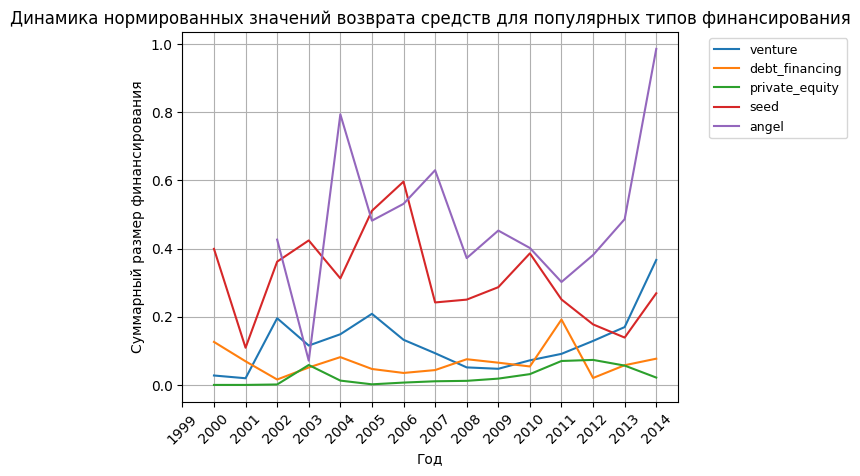

In [745]:
import matplotlib.ticker as ticker
# рисуем график
inv_ret_df_some.plot(kind='line',
           rot=45,
           title='Динамика нормированных значений возврата средств для популярных типов финансирования',
           xlabel='Год',
           ylabel='Суммарный размер финансирования')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid()
plt.xticks(range(1999, 2015))
plt.show()

По графику можно увидеть, что самую большую долю возврата демонстрируют графики seed и angel, однако seed не не показывает стабильный рост в доле возвратов на протяжении данного временного промежутка. Аngel демонстрирует рост доли возвратов 2011 года, также рост доли показывает тип venture, однако доля возвратов гораздо меньше, чем у angel.

### **6. Итоговый вывод и рекомендации**

**Рекомендации**

В 2015 году рекомендуется инвестировать в венчурное финансирование (venture) в отрасли Software и Finance. Венчурное финансирование является наиболее уместным типом, так как обеспечивает максимальную доходность при высокой популярности (23 237 компаний), превосходя seed и debt financing.
Секторы Software и Finance лидируют по объему привлеченных средств, демонстрируя наибольшую активность и потенциал роста. 

**Итоги проекта**

В анализе данных за период до 2015 года выполнены все этапы полного исследования инвестиционного рынка: от загрузки и предобработки датасетов до визуализации и статистических выводов.

Загружены датасеты cb_investments.csv (54 294 строки - записи инвестиций) и cb_returns.csv (15 строк - годы доходностей по типам финансирования). Проведена предобработка данных: удалены лишние пробелы в текстовых данных, проведена очистка (удалены пропуски в funding_total_usd, market; удалены дубликаты)

По **срокам финансирования** большинство команий (примерно 60%) относятся к типу единичного финансирования

**Рынки классифицированы по сегментам**: массовые (36 236 фирм), средние (3841), нишевые(830)

В ходе анализа были иключены данные, находящиеся за пределами 1 и 3 квартилей (выбросы). Были выделены **топ-3 сегментов рынка с наибольше долей компаний с аномальным финансированием** (17%): Real Estate, Entertainment, Consulting. Период исследования был ограничен: с 1999 по 2014 годы

По **популярности и объёмам типов финансирования** лидирует тип венчурных инвестиций

**Количество раундов** растёт стабильно с 1999 по 2013, однако в 2014 наблюдается резкий спад, возможно связанный с неполнотой данных за этот год

**Медианное значение типичного размера средств, которые стартапы получали в рамках одного раунда финансирования**, устойчиво снижается с 2004 по 2014 годы. 

**Доля возврата средств** с 2011 года растёт у типа angel, однако у типа venture также наблюдается тенденция к росту